# **Decision Tree**

**What will you learn?**
1. **Implementation**: Using the classifier from Sklearn
2. **Visualisation**: Using Graphviz and Pydotplus
2. **Tree Metric**: Information Gain, Gini Index, Gain Ratio
3. **Why stop early?**: How Decision trees may sometimes easily be overfitted
4. **Pruning**: An important method that prevents overfitting

## **Implementation Using Sklearn**

Dataset Used - Iris Dataset

In [ ]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
iris = datasets.load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 1)

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_train, y_train_pred)

array([[37,  0,  0],
       [ 0, 34,  0],
       [ 0,  0, 41]])

In [ ]:
confusion_matrix(y_test, y_test_pred)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

For optimisation of code, you can refer to the scikit-learn documentation of DecisionTreeClassifier 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

## **Visualising the data using Graphviz and Pydotplus**

**Graphviz** - Graphviz is open source graph visualization software. Graph visualization is a way of representing structural information such as diagrams of abstract graphs and networks.

**export_graphviz** - This function generates a GraphViz representation of the decision tree in dot format, which is then written into an output file ('out_file'). 

In [ ]:
from sklearn.tree import export_graphviz

In [ ]:
dot_data = export_graphviz(clf, out_file=None,
                          feature_names=iris.feature_names,
                          class_names=iris.target_names, filled=True, rounded=True)

**Pydotplus** - PyDotPlus provides a Python Interface to Graphviz’s Dot language.

In [ ]:
import pydotplus
from IPython.display import Image 

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data)

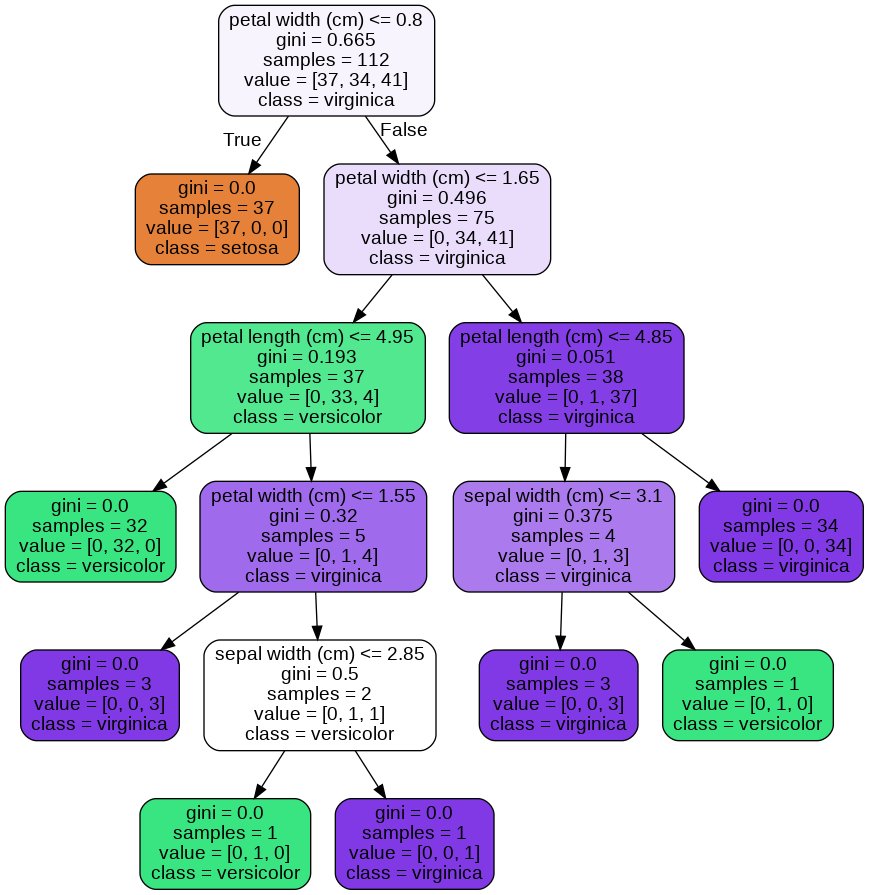

In [ ]:
Image(graph.create_png())

You can export the graph into a pdf format using graph.write_pdf("pdf name.pdf") function . 

## **Tree Metrics**


### **Entropy** 

Entropy controls how a Decision Tree decides to split the data. It actually effects how a Decision Tree draws its boundaries.

A decision tree is built top-down from a root node and involves partitioning the data into subsets that contain instances with similar values (homogenous). We use entropy to calculate the homogeneity of a sample. If the sample is completely homogeneous the entropy is zero and if the sample is equally divided, it has an entropy of one.

$Entropy(randomness) = -\sum_{i}(p_i * log(p_i))$

Here,  $p_i$ = probability of $i^{th}$ class 
= $\frac{no \; of \; elements \; of \; i^{th} class}{total \; no \; of \; elements}$

for example - entropy for 10Y, 40N

= $-\frac {10}{50} log(\frac{10}{50}) - \frac{40}{50} log(\frac{40}{50})$

### **Information Gain**

The information gain is based on the decrease in entropy after a dataset is split on an attribute. Constructing a decision tree is all about finding attribute that returns the highest information gain (i.e., the most homogeneous branches).

Maximizing $[Entropy_{(old)} - Entropy_{(new)}]$ is information gain as we are going towards more pure or homogeneous nodes. We take weighted average of the entropies of two nodes to get the resultant entropy at the level

For example:

<img src ="https://files.codingninjas.in/entrooy-7325.jpg" width = "500">

Let $E_r$ be the entropy after split.

$E_r = \frac{15}{10}E_1 + \frac{35}{40}E_2$

We maximize $E_0 - E_r$

Now consider a situation where we predict whether a person will get a loan. If we split our data on the basis of name, then we will be getting lowest entropy and pure nodes, but that would majorly result in one node having one data point and overfitting will take place. Therefore Information Gain cannot be the only criteria on the basis of which we make our decision to split, rather we should also take in consideration the number of resulting nodes.

###**Split Number**

Split number determines the degree of split i.e more the number of split more will be the split number.

$$Split \; Number = -\sum_{j = 1}^n(\frac{|D_j|}{|D|} * log(\frac{|D_j|}{|D|})$$

Here, $n$ = no of nodes into which we split

$\qquad$$D$ = no of elements in original node on which split happened

$\qquad$$D_j$ = no of elements in $j^{th}$ node



Consider an example:

<img src="https://files.codingninjas.in/split-number-7327.jpg" width="500">

$D_1, D_2, D_3, D_4$ = no of data points in each node after split

$ Split \; Number = -[\frac{1}{50} log(\frac{1}{50}) + \frac{1}{50} log(\frac{1}{50}) + \frac{1}{50} log(\frac{1}{50}) + \frac{47}{50} log(\frac{47}{50})]$

###**Gain Ratio**

We define our measure on the basis of which we will split on an attribute(or feature) considering both Information gain and Split number which is called the **gain ratio**

$$Gain \; Ratio = \frac{Information\; Gain} { Split\; Number}$$

###**Gini Index**

Gini Index calculates the amount of probability of a specific feature that is classified incorrectly when selected randomly. If all the elements are linked with a single class then it can be called pure.

It is calculated by subtracting the sum of squared probabilities of each class from one.

The Gini index varies between values 0 and 1, where 0 expresses the purity of classification, i.e. all the elements belong to a specified class or only one class exists there. And 1 indicates the random distribution of elements across various classes. The value of 0.5 of the Gini Index shows an equal distribution of elements over some classes.

$$Gini \; Index = 1 - \sum^c_{i=1} (p_i)^2$$

Here, c = number of classes

A feature with a lower Gini index is chosen for a split.
The CART algorithm uses the Gini Index for constructing the decision tree

<img src="https://files.codingninjas.in/gini_2-7306.jpeg" width="700">
<img src="https://files.codingninjas.in/gini_3-7307.jpeg" width="700">

In the above shown split we have moved from GI 0.6666 to GI of 0.3333 . A low value of Gini Index is desirable.

Inbuilt decision trees also use Gini Index. 

### **Gini Index vs Information Gain**

1. The Gini Index facilitates bigger distributions easy to implement whereas the Information Gain favors lesser distributions having small count with multiple specific values.
2. The method of the Gini Index is used by CART algorithms, in contrast to it, Information Gain is used in ID3, C4.5 algorithms.
3. Gini index operates on the categorical target variables in terms of “success” or “failure” and performs only binary split, in opposite to that Information Gain computes the difference between entropy before and after the split and indicates the impurity in classes of elements.

##**Overfitting in Decision Trees**

In decision trees, overfitting occurs when the tree is designed so as to perfectly fit all samples in the training data set. Thus it ends up with branches with strict rules of sparse data. Thus, this affects the accuracy when predicting samples that are not part of the training set. 

In simpler words, overfitting happens when our algorithm continues to develop hypotheses that reduce training set error at the cost of an
increased test set error.

We may end up overfitting the tree so much that it leads to 0 training error. For a simple dataset like Iris Dataset, such a tree is simple. But as the data sets become more detailed, the complexity of such a build increases too much.

There are a couple of ways to stop this from happening.



###**Stop Early (Pre-Pruning)**


This method dictates that we add more stopping criteria. Right now, the only two stopping criteria we have is when we reach a pure node, or when number of features exceeds a certain limit. By doing this, we stop early and avoid building of the entire tree before it perfectly classifies the training set.

This can be done in two simple ways:

**Define a max depth (k)**

We shall decide a depth k, till which our tree will build. Beyond that, we will stop the training. 

The problem with this method is that, we may not always choose the optimal k value.

Another problem with this method is that, in some cases, we require unbalanced trees for our classification. But selecting k value would restrict us towards building only balanced decision trees, thus wasting computation time, as well as leading to unwanted errors in classification.

**Stopping when there is no significant gain in Score**

Though this method sounds good theoretically, it has some practical limitations. Let us look at them through the example of XOR.

<img src = "https://files.codingninjas.in/cost1-7320.jpg" width = '550'>


At the intial level, we have **one node** with two YES and two NO. This means the accuracy is of 50%.

At the second level, we have **two nodes**, each with one YES and one NO. Again, the accuracy is of 50%. 

Since there is no significant change in the accuracy, our decision tree will stop itself from further training. But this is a huge loss for us, as, if another split is perfomed on second level, we shall acheive 100% accuracy, as it builds a perfect decision tree for XOR.

<img src = "https://files.codingninjas.in/cost2-7321.jpg" width = '550'>

Due to these issues, early stopping using these methods is generally avoided. To avoid overfitting, the most signigficant method is **Pruning**.

###**Pruning**

Pruning is a technique that allows the tree to perfectly classify the training set, and then trim the tree, such that reduces it the size of decision trees by removing sections of the tree that provide little power to classify instances. Pruning reduces the complexity of the final classifier, and hence improves predictive accuracy by the reduction of overfitting.
Consider the two Decision Tree shown below:

<img src = "https://files.codingninjas.in/pruning_one-7315.png">

As we can see , the first tree is less complex than the second tree. Complexity can increase due to Depth as well as the nodes at a level. We cannot decide just on the basis of Depth or just on the basis of number of nodes at a level.
We add to our original cost a parameter lamda(λ) so that

$$Cost = Error_{(Training \; data)} + \lambda*L(T)$$

where, $\lambda$ = controlling factor and $L(T)$ = no. of leaf nodes.

We start from the bottom of the tree and check for each split. As we encounter a split we decide if we want to keep that split or if we should keep the parent node of that split instead based upon the entropy and cost function of both the situations. If we decide to keep the split, we also have to keep all the splits above that particular split.
Consider the example shown below of a Decision Tree of getting an interview call based upon good project, great intern and the type of college.

<img src = "	https://files.codingninjas.in/dt_pruning-7314.png">


Without pruning the cost of the tree formed is
$$\quad cost = 0.02 + 0.05 $$
$$= 0.07$$ 

(taking $\lambda$ as 0.01 and 1/50 from error function)


After first pruning we have cost as 
$$\quad cost = 0.02 + 0.04 $$
$$ = 0.06$$

which is less than the initial cost, hence we remove the split and do pruning.

Now, if we undo the second split also i.e. do pruning second time as shown above, we get cost as
$$\quad cost = 0.12 +0.03 $$
$$= 0.15$$

Here error has increased too much, therefore, we should keep the split as it is. Since we are keeping this split, we need to keep all the splits above this also.

## **Your Next Step**

You may explore the Decision Tree Classifier in Sklearn and study about its various options.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

